In [89]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

from datetime import datetime
from datetime import date

# Type date you would like to predict in the cell below format = date(year, month, day)

In [90]:
fmt = '%Y-%m-%d'
predict_day = '2020-11-10'
today = '2020-10-29'

d1 = datetime.strptime(predict_day, fmt)
d2 = datetime.strptime(today, fmt)

delta_days = str((d1-d2).days)

In [91]:
print(delta_days)

12


In [92]:
url = ('https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment2-machineLearning/NAS.csv')

In [93]:
df = pd.read_csv(url, sep=',')

In [94]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [95]:
df.isna().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [96]:
df = df.dropna()

In [97]:
df.shape

(4218, 7)

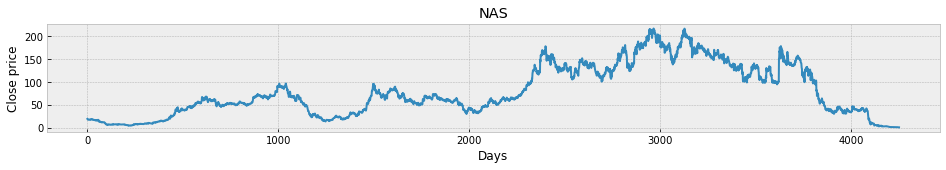

In [98]:
plt.figure(figsize=(16,2))
plt.title('NAS')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])

In [99]:
#Kun hente closeprice
df = df[['Close']]
df.head(4)

,Close
0,19.139799
1,18.454201
2,18.054300
3,17.425800


In [101]:
#X days into the future
future_days = int(delta_days)
#Ny kollonne, men shifted dat
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
4249,0.6006,NaN
4250,0.6260,NaN
4251,0.6050,NaN
4252,0.6106,NaN


In [102]:
#Create feature dataset, gjøre til array of fjerne x dager
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 0.9148  ]
 [ 0.92    ]
 [ 0.94    ]]


In [103]:
#Create target dataset Y, og gjøre tile numpy array, med alle target values untatt de siste X dager
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[17.940001 18.2257   18.3971   ...  0.626     0.605     0.6106  ]


In [104]:
#Deler i trenings og test set, 75, og 25
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25)

In [105]:
#lage modeller
#decision tree regressos
tree = DecisionTreeRegressor().fit(x_train, y_train)
#linear regression
lr = LinearRegression().fit(x_train, y_train)

In [106]:
#henter ut de siste dagene(predictionene)
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[1.047 ],
       [1.0475],
       [1.0325],
       [1.0445],
       [1.014 ],
       [1.017 ],
       [1.    ],
       [0.955 ],
       [0.8674],
       [0.9148],
       [0.92  ],
       [0.94  ]])

In [107]:
#viser tree model
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#vise linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[1.     1.     0.9148 0.94   0.9178 0.9178 1.014  0.6768 0.6006 0.626
 0.605  0.6106]

[2.08256051 2.08305403 2.06824845 2.08009291 2.04998824 2.05294936
 2.03616971 1.99175299 1.90528843 1.95207405 1.95720665 1.97694741]


<ipython-input-108-c2f37b93585b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


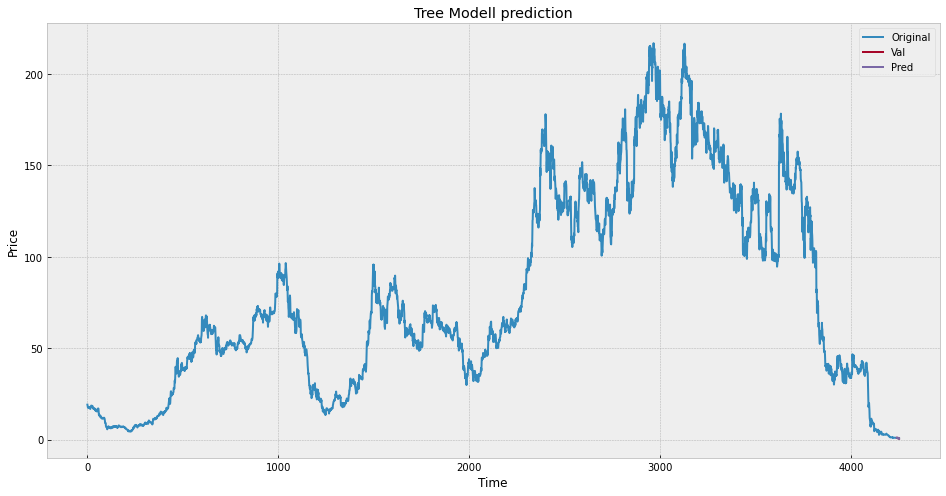

In [108]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tree Modell prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Val','Pred'])

In [109]:
test = valid
test.shape

(12, 3)

In [110]:
test.shape

(12, 3)

In [111]:
test = test.drop(test.index[[0,10]])

In [112]:
test.shape

(10, 3)

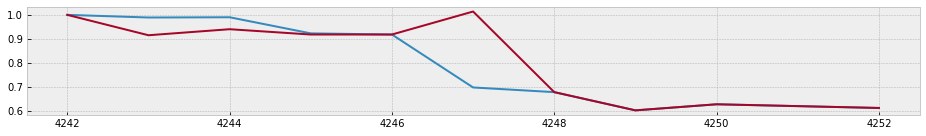

In [113]:
plt.figure(figsize=(16,2))
plt.plot(test[['Close', 'Predictions']])

In [114]:
test

,Close,Prediction,Predictions
4242,1.0000,NaN,1.0000
4243,0.9890,NaN,0.9148
4244,0.9900,NaN,0.9400
4245,0.9226,NaN,0.9178
4246,0.9178,NaN,0.9178
4247,0.6964,NaN,1.0140
4248,0.6768,NaN,0.6768
4249,0.6006,NaN,0.6006
4250,0.6260,NaN,0.6260
4252,0.6106,NaN,0.6106


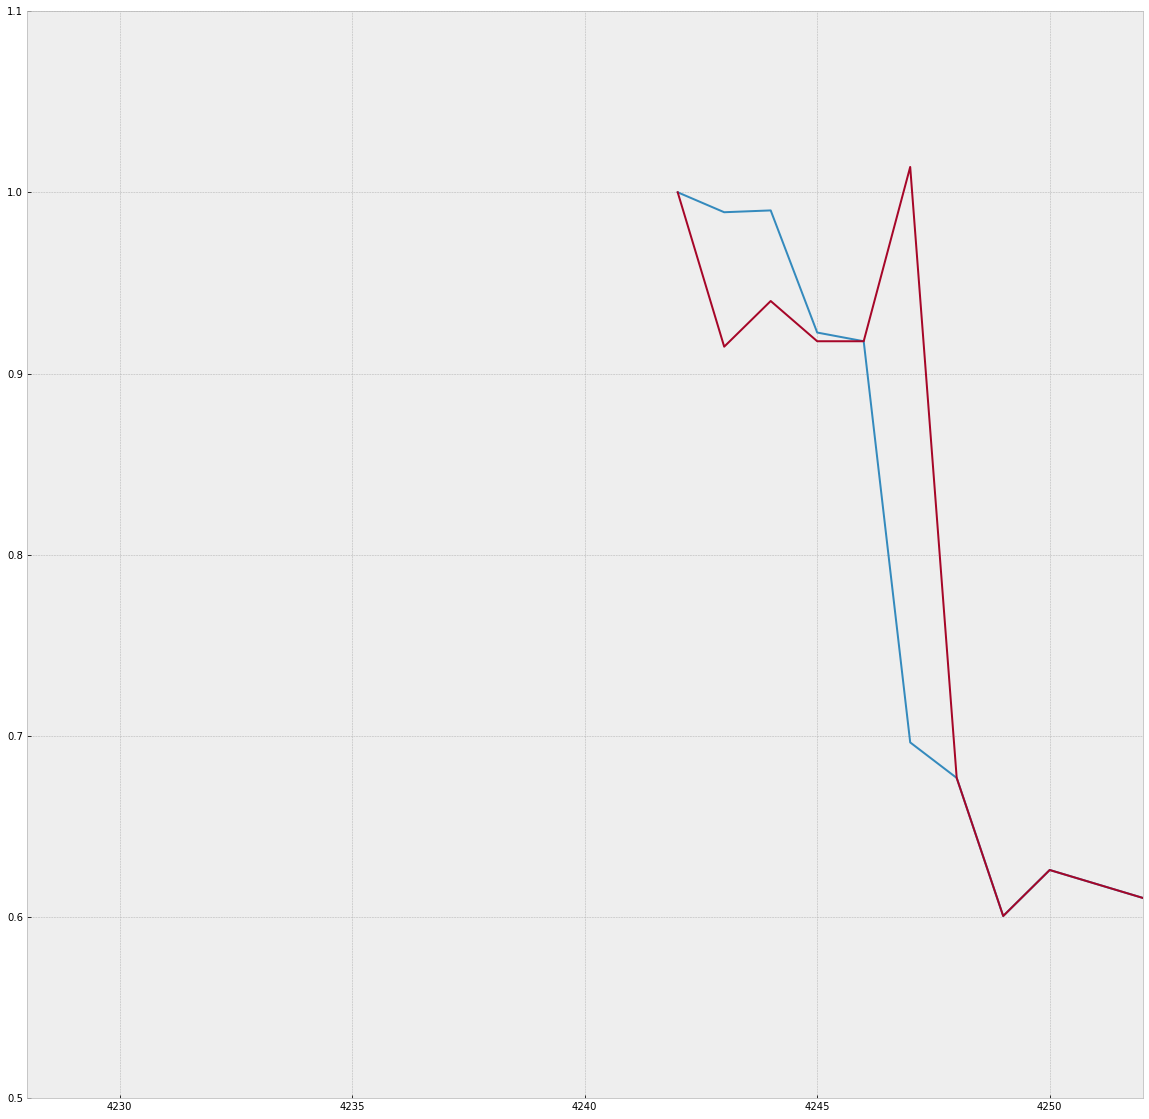

In [115]:
plt.figure(figsize=(20,20))
plt.axis([4228, 4252, 0.5, 1.1])
plt.plot(test[['Close', 'Predictions']])